# Projeto 2 - NLP

-----

Nome:  \<Michel Seung Kun Lee\>  
Turma: \<782\>

Os segundo projeto do módulo de Machine Learning será focado no processamento de linguagem natural! Usaremos os algoritmos aprendidos e as técnicas vistas na segunda parte do curso para extrairmos informações relevantes de texto. Mais precisamente, de publicações no Twitter.

## Os Dados

Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  

Dois arquivos serão disponilizados para o desenvolvimento dos modelos, um para treino/validação e outro para submissão. Os arquivos se encontram na pasta */Dados/train* e */Dados/subm*, respectivamente.

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

## O Problema

Você deverá desenvolver um modelo para detectar o sentimento de uma publicação do Twitter a classificando em uma das três categorias: **positiva**, **negativa** ou **neutra**. O texto da publicação está disponível na coluna "tweet_text". Teste pelo menos 3 técnicas de NLP diferentes e escolha a métrica de avaliação que julgar mais pertinente.  

Escolha o melhor modelo e gere uma base a partir dos dados de submissão, que estão no caminho ```Dados/subm/Subm3Classes.csv```, com o seguinte formato:


|id|sentiment_predict
|-|-|
|12123232|0
|323212|1
|342235|2

Salve essa tabela como um arquivo csv com o nome ```<nome>_<sobrenome>_nlp_degree.csv``` e submeta-o como parte da entrega final do projeto.  

Para ajudar no desenvolvimento, é possível dividir o projeto em algumas fases:

- **Análise de consistência dos dados**: analise se os dados estão fazendo sentido, se os campos estão completos e se há dados duplicados ou faltantes. Se julgar necessário, trate-os.    


- **Análise exploratória**: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna ```tweet_text```.    


- **Pré-processamento e transformações**: projetos de NLP exigem um considerável pré-processamento. Foque no tratamento da string do texto. Procure começar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa você testará diferentes técnicas de transformações, como o Bag Of Words e o TF-IDF.    


- **Treinamento do modelo**: depois das transformações, você poderá executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados na primeira parte do módulo. Você pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperparâmetros do modelo com técnicas como a GridSearch e a RandomizedSearch.    


- **Conclusões**: descreva, em texto, as conclusões sobre os seus estudos. O modelo é capaz de identificar o sentimento das publicações? É possível extrapolar o modelo para outros contextos, como a análise de sentimento de uma frase qualquer? Pense em questões pertinentes e relevantes que você tenha obtido durante o desenvolvimento do projeto!     



## Critérios de avaliação

Os seguintes itens serão avaliados:

1. Desenvolvimento das etapas descritas acima;


2. Reprodutibilidade do código: seu código será executado e precisa gerar os mesmos resultados apresentados por você;


3. Clareza: seu código precisa ser claro e deve existir uma linha de raciocínio direta. Comente o código em pontos que julgar necessário para o entendimento total;


4. Justificativa das conclusões obitdas: não existirá certo ou errado, mas as decisões e as conclusões precisam ser bem justificadas com base nos resultados obtidos.  

O desempenho do modelo **não** será considerado como critério de avaliação.  

## Informações gerais

- O projeto deve ser desenvolvido individualmente;


- Data de divulgação: 11/01/2022;


- Aula de monitoria: 19/01/2022;


- Data de entrega: 26/01/2022;


- Entrega através do Class: Árvore de Decisão -> Exercícios -> Projeto 2


Anexar, na entrega, o notebook de desenvolvimento e o arquivo .csv de submissão, da seguinte forma:  

notebook: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2.ipynb```   
csv: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2_submissao.csv```


## Dicas

### Base de treino e submissão

A base de submissão não possui a variável de saída, portanto ela será utilizada **apenas** para gerar o arquivo que acompanha a submissão do projeto.      

### Tente encontrar possíveis vieses

É muito comum que modelos de NLP possuam fortes vieses, como a tendência de relacionar palavras específicas com alguma classe de saída. Tente encontrar vieses no seu estudo, isso pode ajudar a tirar boas conclusões. o campo "query_used" pode ser útil para essa análise.  

### O pré-processamento é a chave para um bom desempenho

Essa é a etapa que mais vai contribuir para o desempenho do seu modelo. Seja criativo e desenvolva essa etapa de uma maneira que seja fácil de aplicar o mesmo processamento para uma nova base, você terá que fazer isso para gerar a base de submissão.

### Um termômetro para o seu desenvolvimento

Após a correção do seu projeto, o professor irá disponibilizar a sua acurácia obtida na base de submissão. Você pode interpretar esse resultado como a simulação do resultado do seu modelo em produção. Uma diferença entre o resultado do estudo e o resultado de submissão indica um grau de **overfitting** no seu modelo.

-------

# Desenvolvimento do projeto

In [1]:
# Importando os dados do arquivo csv

import pandas as pd

df_tweet = pd.read_csv('Dados/train/Train3classes.csv')

print(df_tweet.shape)

df_tweet.sample(10).head()

(95000, 5)


,id,tweet_text,tweet_date,sentiment,query_used
65302,1045447439883415555,HOJE EU VOU PRODUZIR UM HIT :)),Thu Sep 27 22:57:47 +0000 2018,1,:)
7924,1050196408278704133,"Minas lindas! Parte de uma super equipe linda,...",Thu Oct 11 01:28:30 +0000 2018,2,#trabalho
22726,1049281345342623744,Tô muito triste com vc boa noite :( — PQ MUITO...,Mon Oct 08 12:52:22 +0000 2018,0,:(
61697,1045630207607156737,Pedras nos rins são mais bonitas do que você i...,Fri Sep 28 11:04:03 +0000 2018,2,folha
60491,1046087515122397185,Avião de pequeno porte cai em plantação e deix...,Sat Sep 29 17:21:13 +0000 2018,2,g1


## 1. Divisão da base de teste

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# Separando o Dataframe em Dataframe de Treino e de Teste

df_experiment, df_test = train_test_split(df_tweet, test_size=.3)

In [4]:
print(df_test.shape)

df_test.head()

(28500, 5)


,id,tweet_text,tweet_date,sentiment,query_used
60931,1039911515057532930,Grupo feminino contrário a Bolsonaro chega a 1...,Wed Sep 12 16:20:00 +0000 2018,2,jornaloglobo
25428,1049250810822098944,ela roubou toda minha brisa mano :(,Mon Oct 08 10:51:02 +0000 2018,0,:(
43830,1045402394216075265,Perguntei pro meu psicólogo hoje se ele lembra...,Thu Sep 27 19:58:48 +0000 2018,1,:)
10458,1046854662891147264,Haddad tem mais “votos envergonhados” que Bols...,Mon Oct 01 20:09:35 +0000 2018,2,veja
55729,1048393545508429824,@hiasxcx @estherrhendges uai pode respirar sim...,Sat Oct 06 02:04:34 +0000 2018,1,:)


In [5]:
print(df_experiment.shape)

df_experiment.head()

(66500, 5)


,id,tweet_text,tweet_date,sentiment,query_used
7202,1045373856020598786,Tenho o jantar d anos da minha irmã e não sei ...,Thu Sep 27 18:05:24 +0000 2018,1,:)
4135,1049272637317369856,hoje perguntei a uma colega minha de trabalho ...,Mon Oct 08 12:17:45 +0000 2018,1,:)
72249,1041751135982252033,"&gt;@Emais_Estadao Aos 69, Richard Gere será p...",Mon Sep 17 18:10:00 +0000 2018,2,estadao
77861,1052328934405234689,#Fato Boa noite a todos nós! em São José do Ri...,Tue Oct 16 22:42:23 +0000 2018,2,#fato
51491,1046927738630787072,"[bebê koo &amp; tae falando sobre o futuro] ""h...",Tue Oct 02 00:59:58 +0000 2018,0,:(


In [6]:
df_experiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66500 entries, 7202 to 66364
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          66500 non-null  int64 
 1   tweet_text  66500 non-null  object
 2   tweet_date  66500 non-null  object
 3   sentiment   66500 non-null  int64 
 4   query_used  66500 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.0+ MB


In [7]:
df_tweet['sentiment'].value_counts(dropna=False)

0    31696
1    31678
2    31626
Name: sentiment, dtype: int64

## 2- Análise de consistência dos dados

In [8]:
# Verificando valores únicos no Dataframe

df_experiment.nunique()

id            66495
tweet_text    66029
tweet_date    60645
sentiment         3
query_used       14
dtype: int64

In [9]:
# Verificando presença de valores NaN do Dataframe

df_experiment.isnull().sum()

id            0
tweet_text    0
tweet_date    0
sentiment     0
query_used    0
dtype: int64

In [10]:
# Verificando publicações duplicadas

df_experiment.duplicated().value_counts()

# Verificamos que apesar de alguns itens duplicados nas colunas, não há dados duplicados.

False    66500
dtype: int64

In [11]:
# Verificando se existem dados com a combinação da features "tweet_text" e "sentiment" duplicados.

df_experiment[['tweet_text', 'sentiment']].duplicated().value_counts()

False    66029
True       471
dtype: int64

In [12]:
SUBSET_DUPLICADOS = df_experiment.drop(['tweet_date', 'id'], axis=1).columns.to_list()

num_duplicados = df_experiment.duplicated(subset=SUBSET_DUPLICADOS).sum()

print(f'{num_duplicados} linhas duplicadas em {len(df_experiment)} registros')

466 linhas duplicadas em 66500 registros


In [13]:
df_experimento = df_experiment.drop_duplicates(subset=SUBSET_DUPLICADOS)

print(df_experiment.shape, f'{df_experiment.duplicated(subset=SUBSET_DUPLICADOS).sum()}')

(66500, 5) 466


<AxesSubplot:>

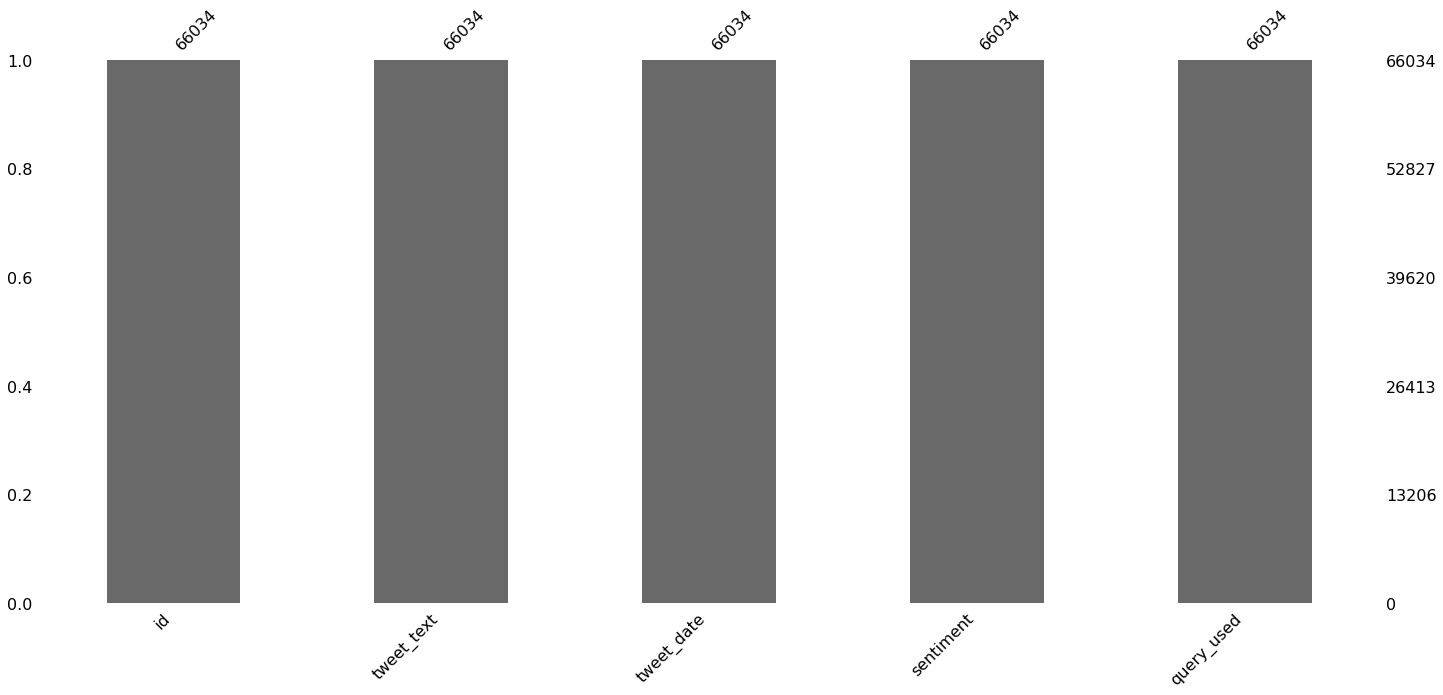

In [14]:
import missingno as msno
msno.bar(df_experimento)

## 3- Análise exploratória

In [15]:
# Verificando o balanceamento da coluna 'tweet_text'

print('Texto mais longo:', df_experiment['tweet_text'].max())
print('Texto mais curto:', df_experiment['tweet_text'].min())

Texto mais longo: 🧜🏼‍♀️ AINNN lindíssima, muitoofeliz por termos nos aproximado💛💛💛 parceria pra tudoo :))
Texto mais curto: !!1!!!!!! céus, tudo para mim. :( https://t.co/VmZAEx0oBu


In [16]:
df_experiment['tweet_text'].str.len().head()

7202      63
4135     191
72249    142
77861     77
51491    301
Name: tweet_text, dtype: int64

In [17]:
df_experiment['tweet_text'].str.len().max()

686

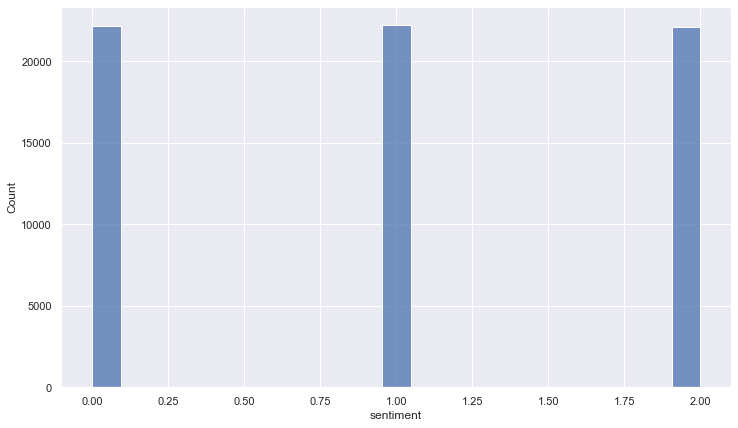

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(12, 7))

sns.histplot(df_experiment['sentiment'])

plt.show()

# Vemos que os dados da coluna 'sentiment'está bem balanceado

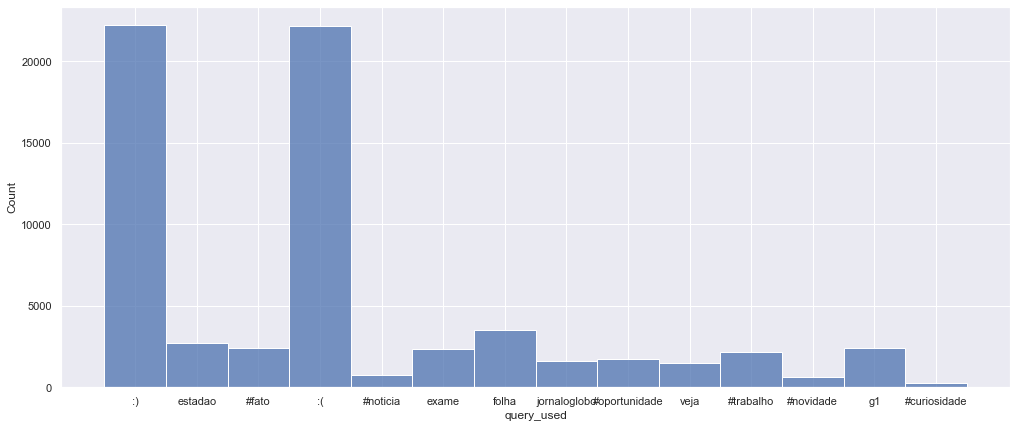

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(17, 7))

sns.histplot(df_experiment['query_used'])

plt.show()

# Vemos um bom balanceamento entre as queries ':)'e ':(' na columa 'query_used'

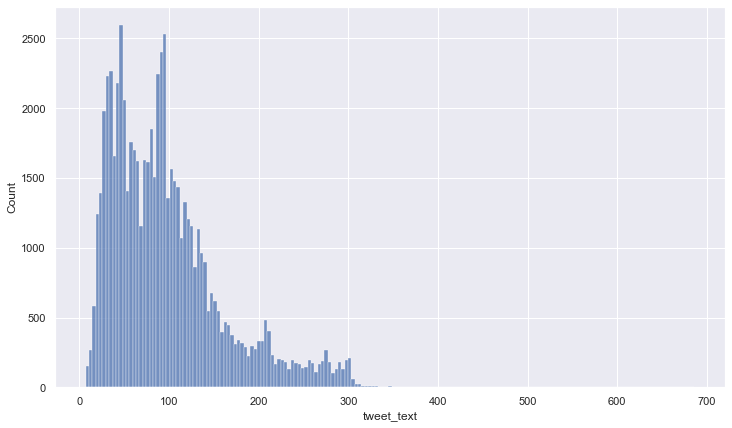

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(12, 7))

sns.histplot(df_experiment['tweet_text'].str.len())

plt.show()

# Vemos uma concentração da quantidade de caracteres nos tweets entre 0 e 200.

In [21]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(texts):
    plt.figure(figsize=(10, 10))
    text = ' '.join(texts.tolist())
    WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5, min_word_length = 5)
    words = WC.generate(text)
    plt.imshow(words, interpolation='bilinear')
    plt.show()
    
# Com os resultados do wordcloud, consegui palavras mais 'adequadas' com o min_word_length 5

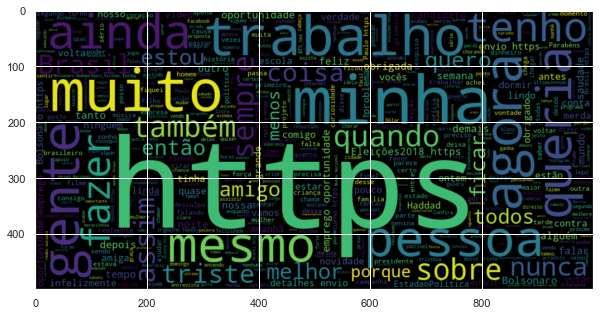

In [22]:
plot_wordcloud(df_experiment['tweet_text'])

In [23]:
import re

def clean_https(df):
    text = df['tweet_text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]);
    
    return text

In [24]:
df_experiment['tweet_text'] = clean_https(df_experiment)

<ipython-input-24-08a8d7fc1ecb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_experiment['tweet_text'] = clean_https(df_experiment)


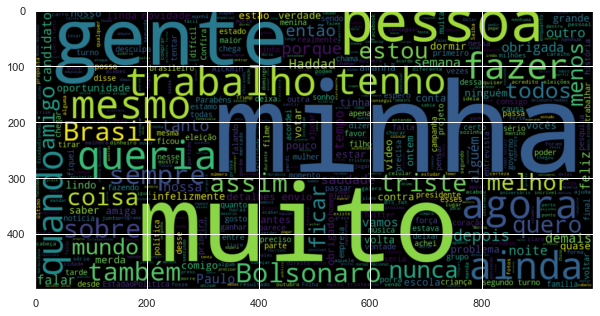

In [25]:
plot_wordcloud(df_experiment['tweet_text'])

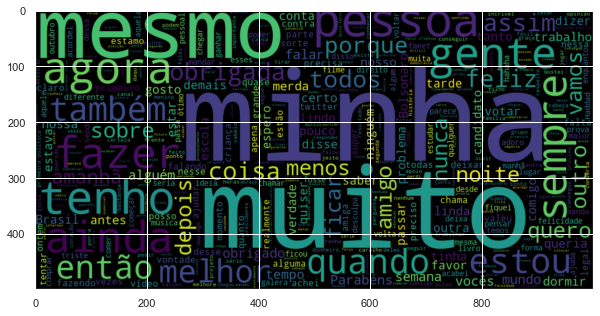

In [26]:
plot_wordcloud(df_experiment.loc[df_experiment['sentiment'] == 1, 'tweet_text'])

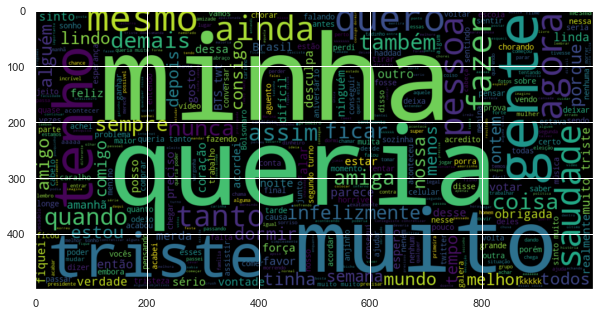

In [27]:
plot_wordcloud(df_experiment.loc[df_experiment['sentiment'] == 0, 'tweet_text'])

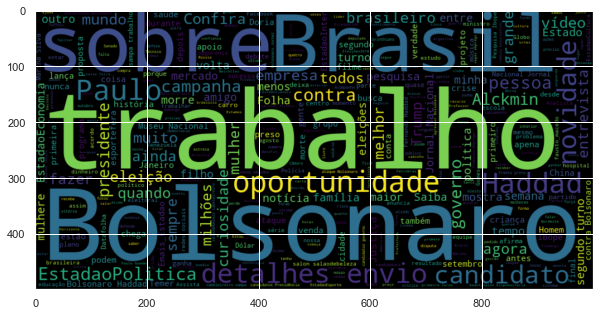

In [28]:
plot_wordcloud(df_experiment.loc[df_experiment['sentiment'] == 2, 'tweet_text'])

## 4- Modelo

### 4.1- Separando Base de Treino e Validação

In [29]:
df_train, df_valid = train_test_split(df_experiment, test_size=.2)

In [30]:
print(df_train.shape)

df_train.head()

(53200, 5)


,id,tweet_text,tweet_date,sentiment,query_used
72239,1049312629129465856,@Kinhocunha20 @AlannaAquin @Lesbicando1995 tá ...,Mon Oct 08 14:56:40 +0000 2018,1,:)
60104,1045420501617848321,@soyalonsovillal Pregunta le a Santa Claus :),Thu Sep 27 21:10:45 +0000 2018,1,:)
624,1048426838694023168,"@tortinhacomgelo hahaha assim que é legal, gen...",Sat Oct 06 04:16:51 +0000 2018,1,:)
30917,1047310180302635008,@rorobitt_ Oi mana :) Saudades,Wed Oct 03 02:19:39 +0000 2018,1,:)
26217,1050737257236324352,Feriadão na cidade canção :D — in Maringá,Fri Oct 12 13:17:38 +0000 2018,1,:)


In [31]:
print(df_valid.shape)

df_valid.head()

(13300, 5)


,id,tweet_text,tweet_date,sentiment,query_used
23953,1037378159841292288,"‘Messi fica deprimido em jogos da seleção’, di...",Wed Sep 05 16:33:21 +0000 2018,2,veja
84679,1046227379696422912,@detailsmx ABRAÇO AAAA :(,Sun Sep 30 02:36:59 +0000 2018,0,:(
46579,1034494163729805314,#Vaga para Auxiliar Odontológico(a) detalhes e...,Tue Aug 28 17:33:23 +0000 2018,2,#oportunidade
86956,1046943496794456065,ai a bea ficou mal :(,Tue Oct 02 02:02:35 +0000 2018,0,:(
50575,1045359438750715909,Acabou de cair o primeiro dente de leite da mi...,Thu Sep 27 17:08:06 +0000 2018,1,:)


In [32]:
x_train, y_train = df_train['tweet_text'], df_train['sentiment']
x_valid, y_valid = df_valid['tweet_text'], df_valid['sentiment']

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(53200,) (53200,)
(13300,) (13300,)


### 4.2 Aplicando o BagOfWords

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000)

vectorizer.fit(x_train)

CountVectorizer(max_features=10000)

In [34]:
x_train_transformed = vectorizer.transform(x_train).toarray()

print(x_train_transformed.shape)

x_valid_transformed = vectorizer.transform(x_valid).toarray()

print(x_valid_transformed.shape)

(53200, 10000)
(13300, 10000)


#### 4.2.1- Selecionando o modelo

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [36]:
modelo_final = MultinomialNB()

modelo_final

MultinomialNB()

In [37]:
# Treino do modelo

modelo_final.fit(x_train_transformed, y_train)

MultinomialNB()

#### 4.2.2-Resultados

In [38]:
y_train_pred = modelo_final.predict(x_train_transformed)

y_valid_pred = modelo_final.predict(x_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(53200,) (13300,)


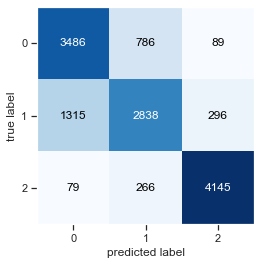

In [39]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred, average='micro')
rec_train = recall_score(y_train, y_train_pred, average='micro')

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred, average='micro')
rec_valid = recall_score(y_valid, y_valid_pred, average='micro')

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.82, Precision: 0.82, Recall: 0.82
Validação:
Acc: 0.79, Precision: 0.79, Recall: 0.79


### 4.3 Aplicando o TF-IDF 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)

vectorizer.fit(x_train)

TfidfVectorizer(max_features=10000)

In [45]:
x_train_transformed = vectorizer.transform(x_train).toarray()

print(x_train_transformed.shape)

x_valid_transformed = vectorizer.transform(x_valid).toarray()

print(x_valid_transformed.shape)

(53200, 10000)
(13300, 10000)


#### 4.3.1- Selecionando o modelo

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
modelo = MultinomialNB()

modelo

MultinomialNB()

In [48]:
# Treino do modelo

modelo.fit(x_train_transformed, y_train)

MultinomialNB()

In [49]:
y_train_pred = modelo.predict(x_train_transformed)

y_valid_pred = modelo.predict(x_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(53200,) (13300,)


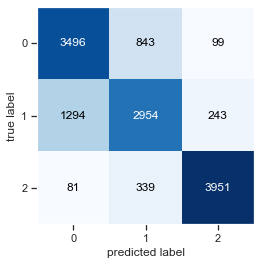

In [50]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

#### 4.3.2-Resultados

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred,average='micro')
rec_train = recall_score(y_train, y_train_pred, average='micro')

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred, average='micro')
rec_valid = recall_score(y_valid, y_valid_pred, average='micro')

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.83, Precision: 0.83, Recall: 0.83
Validação:
Acc: 0.78, Precision: 0.78, Recall: 0.78


### 4.4 Utilizando o Word2Vec

In [52]:
from gensim.utils import simple_preprocess

def tokenize(text):
    return simple_preprocess(text, min_len=1)

from tqdm import tqdm
import numpy as np

def to_word_vector(words, w2v):

    vectors = []

    for word in words:
        vectors.append(w2v.wv[word] if word in w2v.wv.key_to_index else np.zeros(w2v.vector_size))
        
    if not vectors:
        vectors.append(np.zeros(w2v.vector_size))
    
    return np.mean(vectors, axis=0).astype('float16')

def embeddings(x, w2v):
    x = x.copy()

    x = x.apply(tokenize)

    x = np.vstack([[to_word_vector(sentences, w2v)] for sentences in tqdm(x)])

    return x

In [53]:
from gensim.models import Word2Vec

model_w2v = Word2Vec(
        sentences=x_train.apply(
            lambda t: tokenize(t)
        ),
         vector_size=300,
         window=5,
         min_count=1,
         workers=4
    )

In [54]:
x_train_transformed = embeddings(x_train, model_w2v)

x_valid_transformed = embeddings(x_valid, model_w2v)

100%|██████████| 13300/13300 [00:01<00:00, 10289.23it/s]


#### 4.4.1- Selecionando o modelo

In [55]:
from lightgbm import LGBMClassifier

In [57]:
from sklearn.model_selection import GridSearchCV

modelo = LGBMClassifier()

parameters = {
    'max_depth': [3, 4, 5],
    'n_estimators': [20, 50, 70],
    'learning_rate': [0.01, 0.1, 0.5],
    'num_leaves': [10, 20, 30],
    'is_unbalance': [True, False]
}

clf = GridSearchCV(modelo, parameters, verbose=3, scoring='f1_micro', cv=3)

clf.fit(x_train_transformed, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV 1/3] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20, num_leaves=10;, score=0.705 total time=   2.5s
[CV 2/3] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20, num_leaves=10;, score=0.700 total time=   2.3s
[CV 3/3] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20, num_leaves=10;, score=0.695 total time=   2.4s
[CV 1/3] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20, num_leaves=20;, score=0.705 total time=   2.3s
[CV 2/3] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20, num_leaves=20;, score=0.700 total time=   2.3s
[CV 3/3] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20, num_leaves=20;, score=0.695 total time=   2.3s
[CV 1/3] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20, num_leaves=30;, score=0.705 total time=   2.3s
[CV 2/3] END is_unbalance=True, le

[CV 2/3] END is_unbalance=True, learning_rate=0.01, max_depth=5, n_estimators=50, num_leaves=10;, score=0.710 total time=   4.6s
[CV 3/3] END is_unbalance=True, learning_rate=0.01, max_depth=5, n_estimators=50, num_leaves=10;, score=0.709 total time=   4.5s
[CV 1/3] END is_unbalance=True, learning_rate=0.01, max_depth=5, n_estimators=50, num_leaves=20;, score=0.729 total time=   5.4s
[CV 2/3] END is_unbalance=True, learning_rate=0.01, max_depth=5, n_estimators=50, num_leaves=20;, score=0.719 total time=   5.5s
[CV 3/3] END is_unbalance=True, learning_rate=0.01, max_depth=5, n_estimators=50, num_leaves=20;, score=0.718 total time=   5.4s
[CV 1/3] END is_unbalance=True, learning_rate=0.01, max_depth=5, n_estimators=50, num_leaves=30;, score=0.732 total time=   5.6s
[CV 2/3] END is_unbalance=True, learning_rate=0.01, max_depth=5, n_estimators=50, num_leaves=30;, score=0.722 total time=   5.5s
[CV 3/3] END is_unbalance=True, learning_rate=0.01, max_depth=5, n_estimators=50, num_leaves=30;,

[CV 3/3] END is_unbalance=True, learning_rate=0.1, max_depth=4, n_estimators=70, num_leaves=10;, score=0.746 total time=   5.4s
[CV 1/3] END is_unbalance=True, learning_rate=0.1, max_depth=4, n_estimators=70, num_leaves=20;, score=0.751 total time=   5.7s
[CV 2/3] END is_unbalance=True, learning_rate=0.1, max_depth=4, n_estimators=70, num_leaves=20;, score=0.744 total time=   5.4s
[CV 3/3] END is_unbalance=True, learning_rate=0.1, max_depth=4, n_estimators=70, num_leaves=20;, score=0.748 total time=   6.0s
[CV 1/3] END is_unbalance=True, learning_rate=0.1, max_depth=4, n_estimators=70, num_leaves=30;, score=0.751 total time=   5.6s
[CV 2/3] END is_unbalance=True, learning_rate=0.1, max_depth=4, n_estimators=70, num_leaves=30;, score=0.744 total time=   5.7s
[CV 3/3] END is_unbalance=True, learning_rate=0.1, max_depth=4, n_estimators=70, num_leaves=30;, score=0.748 total time=   6.0s
[CV 1/3] END is_unbalance=True, learning_rate=0.1, max_depth=5, n_estimators=20, num_leaves=10;, score=0

[CV 2/3] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=20, num_leaves=20;, score=0.742 total time=   3.3s
[CV 3/3] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=20, num_leaves=20;, score=0.745 total time=   3.1s
[CV 1/3] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=20, num_leaves=30;, score=0.747 total time=   2.9s
[CV 2/3] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=20, num_leaves=30;, score=0.742 total time=   2.9s
[CV 3/3] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=20, num_leaves=30;, score=0.745 total time=   3.2s
[CV 1/3] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=50, num_leaves=10;, score=0.751 total time=   4.6s
[CV 2/3] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=50, num_leaves=10;, score=0.750 total time=   4.3s
[CV 3/3] END is_unbalance=True, learning_rate=0.5, max_depth=4, n_estimators=50, num_leaves=10;, score=0

[CV 3/3] END is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=50, num_leaves=20;, score=0.704 total time=   3.7s
[CV 1/3] END is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=50, num_leaves=30;, score=0.711 total time=   3.5s
[CV 2/3] END is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=50, num_leaves=30;, score=0.706 total time=   3.5s
[CV 3/3] END is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=50, num_leaves=30;, score=0.704 total time=   3.5s
[CV 1/3] END is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=70, num_leaves=10;, score=0.715 total time=   4.3s
[CV 2/3] END is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=70, num_leaves=10;, score=0.708 total time=   4.3s
[CV 3/3] END is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=70, num_leaves=10;, score=0.711 total time=   4.3s
[CV 1/3] END is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=70, num_lea

[CV 1/3] END is_unbalance=False, learning_rate=0.01, max_depth=5, n_estimators=70, num_leaves=30;, score=0.735 total time=   7.2s
[CV 2/3] END is_unbalance=False, learning_rate=0.01, max_depth=5, n_estimators=70, num_leaves=30;, score=0.724 total time=   7.1s
[CV 3/3] END is_unbalance=False, learning_rate=0.01, max_depth=5, n_estimators=70, num_leaves=30;, score=0.726 total time=   7.2s
[CV 1/3] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=20, num_leaves=10;, score=0.728 total time=   2.3s
[CV 2/3] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=20, num_leaves=10;, score=0.719 total time=   2.3s
[CV 3/3] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=20, num_leaves=10;, score=0.721 total time=   2.3s
[CV 1/3] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=20, num_leaves=20;, score=0.728 total time=   2.4s
[CV 2/3] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=20, num_leaves=2

[CV 2/3] END is_unbalance=False, learning_rate=0.1, max_depth=5, n_estimators=20, num_leaves=30;, score=0.734 total time=   3.1s
[CV 3/3] END is_unbalance=False, learning_rate=0.1, max_depth=5, n_estimators=20, num_leaves=30;, score=0.737 total time=   3.1s
[CV 1/3] END is_unbalance=False, learning_rate=0.1, max_depth=5, n_estimators=50, num_leaves=10;, score=0.746 total time=   4.2s
[CV 2/3] END is_unbalance=False, learning_rate=0.1, max_depth=5, n_estimators=50, num_leaves=10;, score=0.738 total time=   4.2s
[CV 3/3] END is_unbalance=False, learning_rate=0.1, max_depth=5, n_estimators=50, num_leaves=10;, score=0.740 total time=   4.3s
[CV 1/3] END is_unbalance=False, learning_rate=0.1, max_depth=5, n_estimators=50, num_leaves=20;, score=0.752 total time=   4.9s
[CV 2/3] END is_unbalance=False, learning_rate=0.1, max_depth=5, n_estimators=50, num_leaves=20;, score=0.747 total time=   5.0s
[CV 3/3] END is_unbalance=False, learning_rate=0.1, max_depth=5, n_estimators=50, num_leaves=20;,

[CV 3/3] END is_unbalance=False, learning_rate=0.5, max_depth=4, n_estimators=50, num_leaves=30;, score=0.747 total time=   4.1s
[CV 1/3] END is_unbalance=False, learning_rate=0.5, max_depth=4, n_estimators=70, num_leaves=10;, score=0.755 total time=   4.5s
[CV 2/3] END is_unbalance=False, learning_rate=0.5, max_depth=4, n_estimators=70, num_leaves=10;, score=0.749 total time=   4.5s
[CV 3/3] END is_unbalance=False, learning_rate=0.5, max_depth=4, n_estimators=70, num_leaves=10;, score=0.754 total time=   4.5s
[CV 1/3] END is_unbalance=False, learning_rate=0.5, max_depth=4, n_estimators=70, num_leaves=20;, score=0.755 total time=   4.9s
[CV 2/3] END is_unbalance=False, learning_rate=0.5, max_depth=4, n_estimators=70, num_leaves=20;, score=0.747 total time=   4.9s
[CV 3/3] END is_unbalance=False, learning_rate=0.5, max_depth=4, n_estimators=70, num_leaves=20;, score=0.750 total time=   4.9s
[CV 1/3] END is_unbalance=False, learning_rate=0.5, max_depth=4, n_estimators=70, num_leaves=30;,

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'is_unbalance': [True, False],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 4, 5], 'n_estimators': [20, 50, 70],
                         'num_leaves': [10, 20, 30]},
             scoring='f1_micro', verbose=3)

In [58]:
clf.best_params_

{'is_unbalance': True,
 'learning_rate': 0.5,
 'max_depth': 4,
 'n_estimators': 70,
 'num_leaves': 10}

In [59]:
modelo = LGBMClassifier(**clf.best_params_)

In [60]:
modelo.fit(x_train_transformed, y_train)

LGBMClassifier(is_unbalance=True, learning_rate=0.5, max_depth=4,
               n_estimators=70, num_leaves=10)

In [61]:
y_train_pred = modelo.predict(x_train_transformed)

y_valid_pred = modelo.predict(x_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(53200,) (13300,)


#### 4.4.2-Resultados

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred,average='micro')
rec_train = recall_score(y_train, y_train_pred, average='micro')

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred, average='micro')
rec_valid = recall_score(y_valid, y_valid_pred, average='micro')

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.82, Precision: 0.82, Recall: 0.82
Validação:
Acc: 0.75, Precision: 0.75, Recall: 0.75


#### 4.4.3 - Word2Vec c/ RandomForest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
from sklearn.model_selection import GridSearchCV

modelo = RandomForestClassifier()

parameters = {
    'max_depth': [3, 4, 5],
    'n_estimators': [20, 50, 70],
    'random_state': [10, 12, 15]
}

clf = GridSearchCV(modelo, parameters, verbose=3, scoring='f1_micro', cv=3)

clf.fit(x_train_transformed, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_depth=3, n_estimators=20, random_state=10;, score=0.693 total time=   2.8s
[CV 2/3] END max_depth=3, n_estimators=20, random_state=10;, score=0.695 total time=   2.8s
[CV 3/3] END max_depth=3, n_estimators=20, random_state=10;, score=0.688 total time=   2.7s
[CV 1/3] END max_depth=3, n_estimators=20, random_state=12;, score=0.693 total time=   2.6s
[CV 2/3] END max_depth=3, n_estimators=20, random_state=12;, score=0.692 total time=   2.7s
[CV 3/3] END max_depth=3, n_estimators=20, random_state=12;, score=0.693 total time=   2.7s
[CV 1/3] END max_depth=3, n_estimators=20, random_state=15;, score=0.695 total time=   2.5s
[CV 2/3] END max_depth=3, n_estimators=20, random_state=15;, score=0.695 total time=   2.6s
[CV 3/3] END max_depth=3, n_estimators=20, random_state=15;, score=0.690 total time=   2.7s
[CV 1/3] END max_depth=3, n_estimators=50, random_state=10;, score=0.693 total time=   6.7s
[CV 2/3] END max_de

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'n_estimators': [20, 50, 70],
                         'random_state': [10, 12, 15]},
             scoring='f1_micro', verbose=3)

In [65]:
clf.best_params_

{'max_depth': 5, 'n_estimators': 70, 'random_state': 12}

In [66]:
modelo = RandomForestClassifier(**clf.best_params_)

In [67]:
modelo.fit(x_train_transformed, y_train)

RandomForestClassifier(max_depth=5, n_estimators=70, random_state=12)

In [68]:
y_train_pred = modelo.predict(x_train_transformed)

y_valid_pred = modelo.predict(x_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(53200,) (13300,)


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred,average='micro')
rec_train = recall_score(y_train, y_train_pred, average='micro')

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred, average='micro')
rec_valid = recall_score(y_valid, y_valid_pred, average='micro')

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.72, Precision: 0.72, Recall: 0.72
Validação:
Acc: 0.70, Precision: 0.70, Recall: 0.70


#### 4.4.4 - Word2Vec c/ AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
from sklearn.model_selection import GridSearchCV

modelo = RandomForestClassifier()

parameters = {
    'n_estimators': [20, 50, 70],
    'random_state': [10, 12, 15]
}

clf = GridSearchCV(modelo, parameters, verbose=3, scoring='f1_micro', cv=3)

clf.fit(x_train_transformed, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ..n_estimators=20, random_state=10;, score=0.736 total time=  12.5s
[CV 2/3] END ..n_estimators=20, random_state=10;, score=0.730 total time=  12.7s
[CV 3/3] END ..n_estimators=20, random_state=10;, score=0.729 total time=  12.2s
[CV 1/3] END ..n_estimators=20, random_state=12;, score=0.737 total time=  12.5s
[CV 2/3] END ..n_estimators=20, random_state=12;, score=0.728 total time=  13.0s
[CV 3/3] END ..n_estimators=20, random_state=12;, score=0.738 total time=  12.7s
[CV 1/3] END ..n_estimators=20, random_state=15;, score=0.735 total time=  12.6s
[CV 2/3] END ..n_estimators=20, random_state=15;, score=0.732 total time=  12.7s
[CV 3/3] END ..n_estimators=20, random_state=15;, score=0.731 total time=  12.5s
[CV 1/3] END ..n_estimators=50, random_state=10;, score=0.750 total time=  30.7s
[CV 2/3] END ..n_estimators=50, random_state=10;, score=0.740 total time=  31.7s
[CV 3/3] END ..n_estimators=50, random_state=10;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [20, 50, 70],
                         'random_state': [10, 12, 15]},
             scoring='f1_micro', verbose=3)

In [72]:
modelo = AdaBoostClassifier(**clf.best_params_)

In [73]:
modelo.fit(x_train_transformed, y_train)

AdaBoostClassifier(n_estimators=70, random_state=10)

In [74]:
y_train_pred = modelo.predict(x_train_transformed)

y_valid_pred = modelo.predict(x_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(53200,) (13300,)


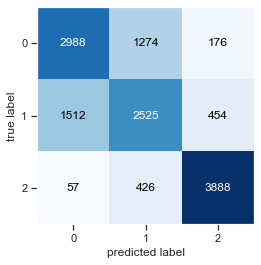

In [75]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred,average='micro')
rec_train = recall_score(y_train, y_train_pred, average='micro')

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred, average='micro')
rec_valid = recall_score(y_valid, y_valid_pred, average='micro')

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.72, Precision: 0.72, Recall: 0.72
Validação:
Acc: 0.71, Precision: 0.71, Recall: 0.71


## 5 - Observações

Adotei o Naive Bayes para o BoW e para o TD-IDF, visto que ele normalmente traz um resultado melhor do que os outros. Para o Word2Vec, testei os modelos de LGBM, AdaBoost e o RandomForest.

Com os resultados das técnicas de transformação, apesar do melhor resultado do Word2Vec com o modelo LGBM no treino, verifiquei que o BoW com o modelo Naive Bayes, apresentou um resultado melhor na validação.

Dessa forma, decidi adotar esse método como o modelo a ser usado para o projeto.

## 6 - Inferência na base de teste

### 6.1 - Base Teste do Dataframe do arquivo Train3classes

In [41]:
print(df_test.shape)

df_test.head()

(28500, 5)


,id,tweet_text,tweet_date,sentiment,query_used
60931,1039911515057532930,Grupo feminino contrário a Bolsonaro chega a 1...,Wed Sep 12 16:20:00 +0000 2018,2,jornaloglobo
25428,1049250810822098944,ela roubou toda minha brisa mano :(,Mon Oct 08 10:51:02 +0000 2018,0,:(
43830,1045402394216075265,Perguntei pro meu psicólogo hoje se ele lembra...,Thu Sep 27 19:58:48 +0000 2018,1,:)
10458,1046854662891147264,Haddad tem mais “votos envergonhados” que Bols...,Mon Oct 01 20:09:35 +0000 2018,2,veja
55729,1048393545508429824,@hiasxcx @estherrhendges uai pode respirar sim...,Sat Oct 06 02:04:34 +0000 2018,1,:)


In [42]:
df_test.isnull().sum()

id            0
tweet_text    0
tweet_date    0
sentiment     0
query_used    0
dtype: int64

### 6.1.1 - Definição das varíaveis de entrada e saída

In [43]:
x_test = df_test['tweet_text']
y_test = df_test['sentiment']

print(x_test.shape, y_test.shape)

(28500,) (28500,)


### 6.1.2 - Aplicação do Modelo BoW Treinado

In [44]:
x_test_transformed = vectorizer.transform(x_test).toarray()

print(x_test_transformed.shape)

(28500, 10000)


In [45]:
y_test_pred = modelo_final.predict(x_test_transformed)

print(y_test_pred.shape)

(28500,)


### 6.1.3 - Resultado

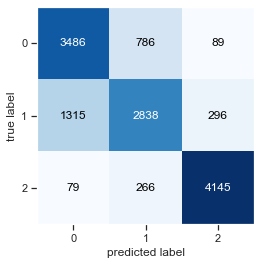

In [47]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred,average='micro')
rec_test = recall_score(y_test, y_test_pred, average='micro')


print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Teste:
Acc: 0.79, Precision: 0.79, Recall: 0.79


### 6.2 - Base subm

In [49]:
df_subm = pd.read_csv('Dados/subm/Subm3classes.csv')

print(df_subm.shape)

df_subm.sample(10).head()

(5000, 4)


,id,tweet_text,tweet_date,query_used
416,1048966180310900736,&gt;@fausto_macedo Operação Eleições 2018: 196...,Sun Oct 07 16:00:00 +0000 2018,estadao
4728,1042442471597375493,Alvaro: ‘O que Bolsonaro administrou? foi sínd...,Wed Sep 19 15:57:07 +0000 2018,veja
2927,1038017354792411137,Atentado deixa incerteza sobre retorno de Bols...,Fri Sep 07 10:53:17 +0000 2018,veja
3472,1050758437028671488,"sdds eu tenho eh do Ciro, n de vc :))",Fri Oct 12 14:41:48 +0000 2018,:)
2499,1046974314451537921,eu não queria ana paula x nadja :( eu amava as...,Tue Oct 02 04:05:03 +0000 2018,:(


In [50]:
df_subm.isnull().sum()

id            0
tweet_text    0
tweet_date    0
query_used    0
dtype: int64

### 6.2.1 - Definição das varíaveis de entrada e saída

In [51]:
x_subm = df_subm['tweet_text']

print(x_subm.shape)

(5000,)


### 6.2.2 - Aplicação do Modelo BoW Treinado

In [52]:
x_subm_transformed = vectorizer.transform(x_subm).toarray()

print(x_subm_transformed.shape)

(5000, 10000)


In [53]:
y_subm_pred = modelo_final.predict(x_subm_transformed)

print(y_subm_pred.shape)

(5000,)


In [54]:
df_subm['sentiment_predict'] = y_subm_pred

df_subm.sample(10).head()

,id,tweet_text,tweet_date,query_used,sentiment_predict
1014,1038011496599408640,‘Estadão Notícias’: Estratégia do PT para mant...,Fri Sep 07 10:30:00 +0000 2018,estadao,2
2005,1046914770253860865,ciro continua ganhando com folga do bozo. argh :(,Tue Oct 02 00:08:26 +0000 2018,:(,0
3931,1032639913236156417,"Hoje, dia 23/8 a agencia de empregos Tectemp e...",Thu Aug 23 14:45:15 +0000 2018,#oportunidade,2
3340,1046791172402958336,@sailorloona_ @laufeystrrk a netflix ainda não...,Mon Oct 01 15:57:18 +0000 2018,:(,2
4193,1044645459938213888,FMI diz que seguirá com relacionamento próximo...,Tue Sep 25 17:51:00 +0000 2018,exame,2


### 6.2.3 - Testando a performance do modelo na Base Subm

In [55]:
# Definindo uma função para criar a coluna "sentiment_query" baseado na coluna "query"

def sentimento(query):
    if query == ':)':
        return 1
    elif query == ':(':
        return 0
    else:
        return 2

In [56]:
df_subm['query_used'].apply(sentimento)

0       1
1       1
2       1
3       2
4       1
       ..
4995    1
4996    2
4997    0
4998    1
4999    0
Name: query_used, Length: 5000, dtype: int64

In [57]:
df_subm['sentiment_query'] = df_subm['query_used'].apply(sentimento)

In [58]:
y_subm = df_subm['sentiment_query']

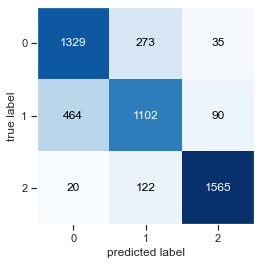

In [59]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_subm, y_subm_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_subm = accuracy_score(y_subm, y_subm_pred)
prec_subm = precision_score(y_subm, y_subm_pred,average='micro')
rec_subm = recall_score(y_subm, y_subm_pred, average='micro')


print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Teste:
Acc: 0.79, Precision: 0.79, Recall: 0.79


## 7 - Gerando o arquivo "projeto_2_submissao.csv" com as predições do modelo

In [ ]:
import os  

os.makedirs('folder/subfolder', exist_ok=True)  

df.to_csv('folder/subfolder/out.csv')

In [64]:
df_subm_final.head()

,id,sentiment_predict
0,1046764676707753987,2
1,1047329264943751169,1
2,1045443874947313665,1
3,1040484298711814144,2
4,1045411876887306240,1


In [66]:
import pandas as pd
import os

df_subm_final = pd.DataFrame(df_subm, columns=['id', 'sentiment_predict'])

df_subm_final.to_csv ('~/DSdegree/5MachineLearning/Projeto 2 - NLP/projeto_2_submissao.csv',
                      index = False, header=True)


In [67]:
pd_csv_final = pd.read_csv('~/DSdegree/5MachineLearning/Projeto 2 - NLP/projeto_2_submissao.csv')


pd_csv_final.sample(10).head()

,id,sentiment_predict
3083,1045506912937299970,0
1565,1036792725675405314,2
3059,1050718920993198080,1
4113,1050708808723587072,1
2501,1046721556141895681,0


## 8 - Conclusão

Acreditamos que conseguimos uma performance razoável nos indicadores de performance do modelo, tanto no teste, quanto na validação.

Visto o que pude perceber na nuvem de palavra, acredito que foi pertinente a limpeza do 'https'.

Além disso, verificamos com os gráficos que há uma distribuição razoavelmente igual entre os 3 tipos de sentimento. Isso pode contribuir para o treino adequado dos modelos em relação aos respectivos outputs dos sentimentos, contribuindo, dessa forma para uma melhor predição.

Ainda, visto que são dados bastante ricos, e com o que foi dito acima, acreditamos que podemos extrapolar o modelo para outros contextos, claro que levando em consideração que os outputs de previsão se limitam aos 3 tipos de sentimento.

Uma coisa importante a se falar nesse aspecto do modelo é que pode ser que devido a própria característica do BoW, que acontece também como o TD-IDF, é que o modelo pode ter uma limitação por não levar em conta a ordem das palavras e nem os sinônimos.

    - Análise exploratória: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna tweet_text.

    - Pré-processamento e transformações: projetos de NLP exigem um considerável pré-processamento. Foque no tratamento da string do texto. Procure começar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa você testará diferentes técnicas de transformações, como o Bag Of Words e o TF-IDF.

    - Treinamento do modelo: depois das transformações, você poderá executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados na primeira parte do módulo. Você pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperparâmetros do modelo com técnicas como a GridSearch e a RandomizedSearch.

    - Conclusões: descreva, em texto, as conclusões sobre os seus estudos. O modelo é capaz de identificar o sentimento das publicações? É possível extrapolar o modelo para outros contextos, como a análise de sentimento de uma frase qualquer? Pense em questões pertinentes e relevantes que você tenha obtido durante o desenvolvimento do projeto!
